# Check if A Random Variable is Normally Distributed

In [2]:
import pandas as pd

In [4]:
xl = pd.ExcelFile('distrib.xls')
# xl.sheet_names
df = xl.parse('Лист1')
df.head()

,No,La,LN,Ch,Un,Nl,Ls,C3,U3,Lo
0,2.638118,1.559936,5.796803,2.106319,2.388562,-2.891846,2.194869,2.883311,5.818445,70.021492
1,2.939677,1.106321,3.120341,5.040086,2.757530,-2.356624,0.835470,4.318595,5.773400,114.122601
2,2.036079,1.202140,23.299866,3.966322,3.585284,-2.740712,3.455526,12.033311,3.758904,102.786300
3,4.073466,1.192179,9.952675,3.882852,2.892209,0.038125,0.599163,17.623683,3.209204,9.499374
4,4.673323,1.839849,4.193463,2.971356,3.083651,2.085697,0.028275,6.324346,3.087344,39.115391


Are values of random variable __Ch__ normally distributed?

In [9]:
X = df[['Ch']].values
len(X)

300

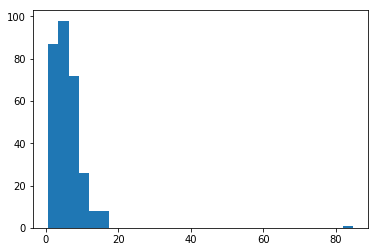

In [17]:
import matplotlib.pyplot as plt
plt.hist(X,bins=30)
plt.show()

In [18]:
it looks like normal distribution.

In [ ]:
Let's find outlayers using boxplot

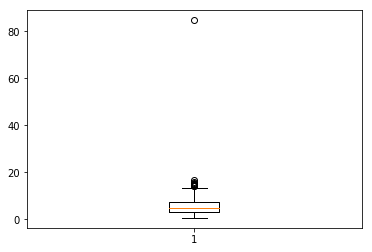

In [20]:
plt.boxplot(X)
plt.show()

In [ ]:
Clearly, there is one outlier. It is far above whiskers.

In [33]:
X.max()

8.0

In [21]:
X = X[X<20]

In [45]:
# bin size
step = 1
n_of_bins = int((X.max() - X.min())/step)

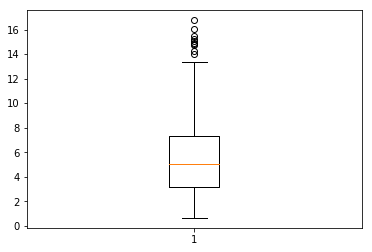

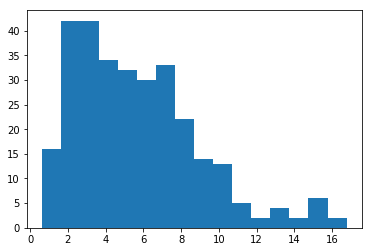

In [46]:
plt.boxplot(X)
plt.show()
plt.hist(X, bins=n_of_bins)
plt.show()

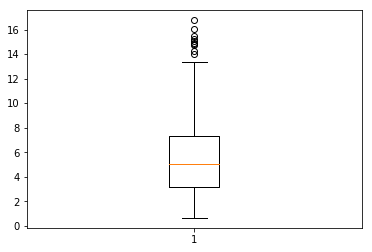

In [67]:
z = plt.boxplot(X)
plt.show()

In [69]:
whiskers = z['whiskers']
top_whisker = whiskers[1]
top_whisker.__dict__

{'_stale': False,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x7fe631cbf8d0>,
 'figure': <Figure size 432x288 with 1 Axes>,
 '_transform': CompositeGenericTransform(
     TransformWrapper(
         BlendedAffine2D(
             IdentityTransform(),
             IdentityTransform())),
     CompositeGenericTransform(
         BboxTransformFrom(
             TransformedBbox(
                 Bbox(x0=0.5, y0=-0.1658674126189763, x1=1.5, y1=17.561640877658203),
                 TransformWrapper(
                     BlendedAffine2D(
                         IdentityTransform(),
                         IdentityTransform())))),
         BboxTransformTo(
             TransformedBbox(
                 Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                 BboxTransformTo(
                     TransformedBbox(
                         Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                         Affi

In [74]:
top_box_border_y = top_whisker.get_ydata()[0]
top_whisker_y = top_whisker.get_ydata()[1]

In [ ]:
Let's remove values above top whisker.

In [75]:
X = X[X<top_whisker_y]

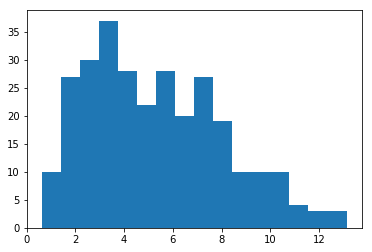

In [78]:
plt.hist(X, bins=n_of_bins)
plt.show()

In [ ]:
This resembles normal distribution even better.

/home/aware/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


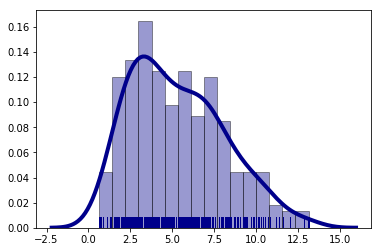

In [85]:
import seaborn as sns
sns.distplot(X, hist=True, kde=True, rug = True,
             bins=n_of_bins, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [ ]:
Visually, this can be considered as normal. However, let's test the hypothesis formally.

In [99]:
from scipy import stats
k2, p = stats.normaltest(X)
alpha = 0.01
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0.000446365
The null hypothesis can be rejected


In [ ]:
Theoretically, it is 99% chance that it is __not__ in fact a normally distributed random variable. ??

In [ ]:
Finding out if it fits to normal scale. (It should be close to the red line)

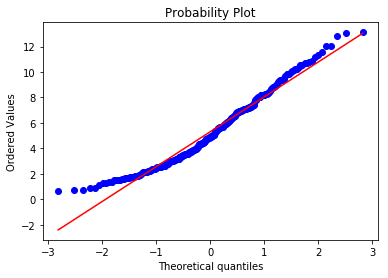

In [100]:
import pylab 
import scipy.stats as stats

stats.probplot(X, dist="norm", plot=pylab)
pylab.show()

# Misc

In [2]:
xl = pd.ExcelFile("kaffee.xls")
xl.sheet_names

['Лист1']

In [3]:
df = xl.parse("Лист1")
df.head()

,menge,preis,nummer,marke,dauer,alter,klasse,einkm,persn,prbew,bildg,treue
1,1,1,1,4,11,2,5,1,2,1,2,1
2,2,2,8,8,13,2,2,3,4,4,3,1
3,1,3,14,9,24,2,1,4,4,4,3,2
4,1,2,17,1,57,4,4,2,1,1,2,2
5,1,3,20,7,15,3,4,2,2,1,3,1


We are using $\chi^2$ criterium to check if random variables are dependant or not.

$$\hat\chi^2_{(N-1)(M-1)}=\sum_i^N\sum_j^M\frac{(n_{ij}-\hat n_{ij})^2}{\hat n_{ij}}$$

$$\text{freedom levels}= N\cdot M -1 - (M-1) -(N-1)=(N-1)(M-1)$$

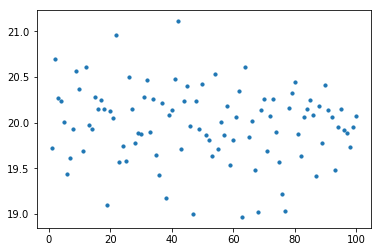

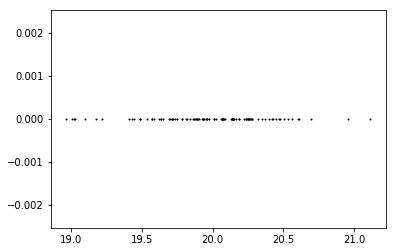

p = 0.252235
The null hypothesis cannot be rejected


In [94]:
# df[['preis', 'marke']]
import numpy as np
import matplotlib.pyplot as plt
ksi = np.random.normal(20, .4, 100)
plt.scatter(np.arange(1, 101, 1), ksi, s = 10)
plt.show()
plt.scatter(ksi, np.zeros(100), s=1, c='black')
plt.show()
from scipy import stats
k2, p = stats.normaltest(ksi)
alpha = 0.001
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


In [32]:
mu, sigma = 0, 1
X1 = np.random.normal(mu, sigma, 100)
X2 = np.random.normal(2, sigma, 100)

In [33]:
y = 3 + 2*X1 - X2 + np.random.normal(0, .25, 100)

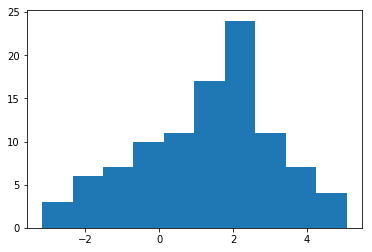

In [34]:
plt.hist(y)
plt.show()

In [36]:
np.corrcoef([y, X1, X2])

array([[ 1.        ,  0.85848696, -0.40814845],
       [ 0.85848696,  1.        ,  0.09708987],
       [-0.40814845,  0.09708987,  1.        ]])

In [39]:
from scipy.stats.stats import pearsonr
pearsonr(y, X1)

(0.8584869620729292, 3.5301374030883454e-30)

In [48]:
df = pd.DataFrame(np.concatenate([y[:,None], X1[:,None], X2[:,None]], axis=1))
df[[0,1]][:5].values

array([[ 1.10130469,  0.27657817],
       [ 2.37469403,  0.30943258],
       [ 3.20945929,  1.16187222],
       [ 0.2529406 , -0.12969888],
       [ 2.45645765,  0.64721293]])

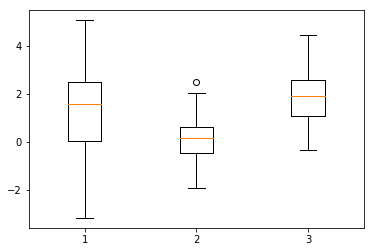

In [41]:
plt.boxplot([y, X1, X2])
plt.show()

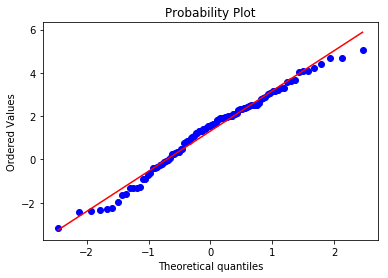

In [42]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df[0], dist="norm", plot=pylab)
pylab.show()

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df[[0,1]].values, y)

# reg.score(X1[:,None], y)

print(reg.coef_, reg.intercept_) 

[ 1.00000000e+00 -1.93949172e-16] -2.220446049250313e-16


In [22]:
print(np.linspace(1, 100, 100)) # start, stop, number of points
np.arange(1,100 + 1,1) # like range(1,101, 1)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])